In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("winequality-red.csv")
df.shape

(1599, 12)

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
#Pengecekan target variable
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

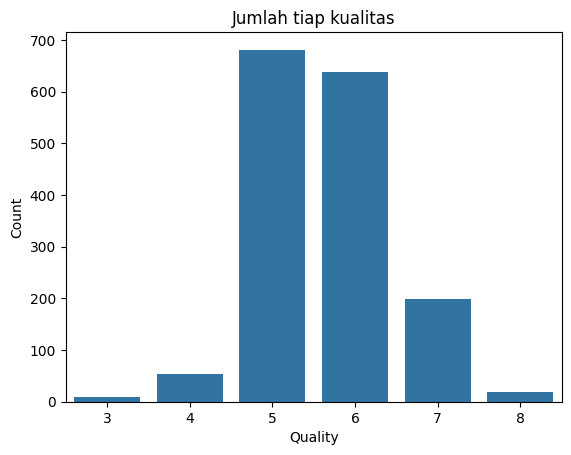

In [32]:
sns.countplot(x='quality', data=df, order=sorted(df['quality'].unique()))
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Jumlah tiap kualitas")
plt.show()

In [33]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Encode the ordinal data using OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
X_encoded = ordinal_encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [36]:
# Create and train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train_res, y_train_res)

In [37]:
# Make predictions on the test data
from sklearn.metrics import accuracy_score, precision_score
predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')

# Print the accuracy and precision
print("Accuracy:", accuracy)
print("Precision:", precision)

print("Classifier Parameters:")
print(clf.get_params())

Accuracy: 0.628125
Precision: 0.651109871031746
Classifier Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [38]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(clf, X_train_res, y_train_res, cv=10)

# Print each fold's score
print("Cross-validation scores for each fold:", scores)

# Calculate and print the mean cross-validated score
mean_score = scores.mean()
print("Mean cross-validated score:", mean_score * 100, "%")

Cross-validation scores for each fold: [0.86102719 0.86404834 0.89728097 0.87009063 0.87915408 0.84592145
 0.88181818 0.89393939 0.9        0.91212121]
Mean cross-validated score: 88.0540144648906 %


In [39]:
feature_names = X.columns
feature_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [40]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
volatile acidity,0.130639
sulphates,0.128569
alcohol,0.123776
total sulfur dioxide,0.108722
chlorides,0.108674
pH,0.075353
free sulfur dioxide,0.069128
density,0.066666
fixed acidity,0.063091
citric acid,0.063069


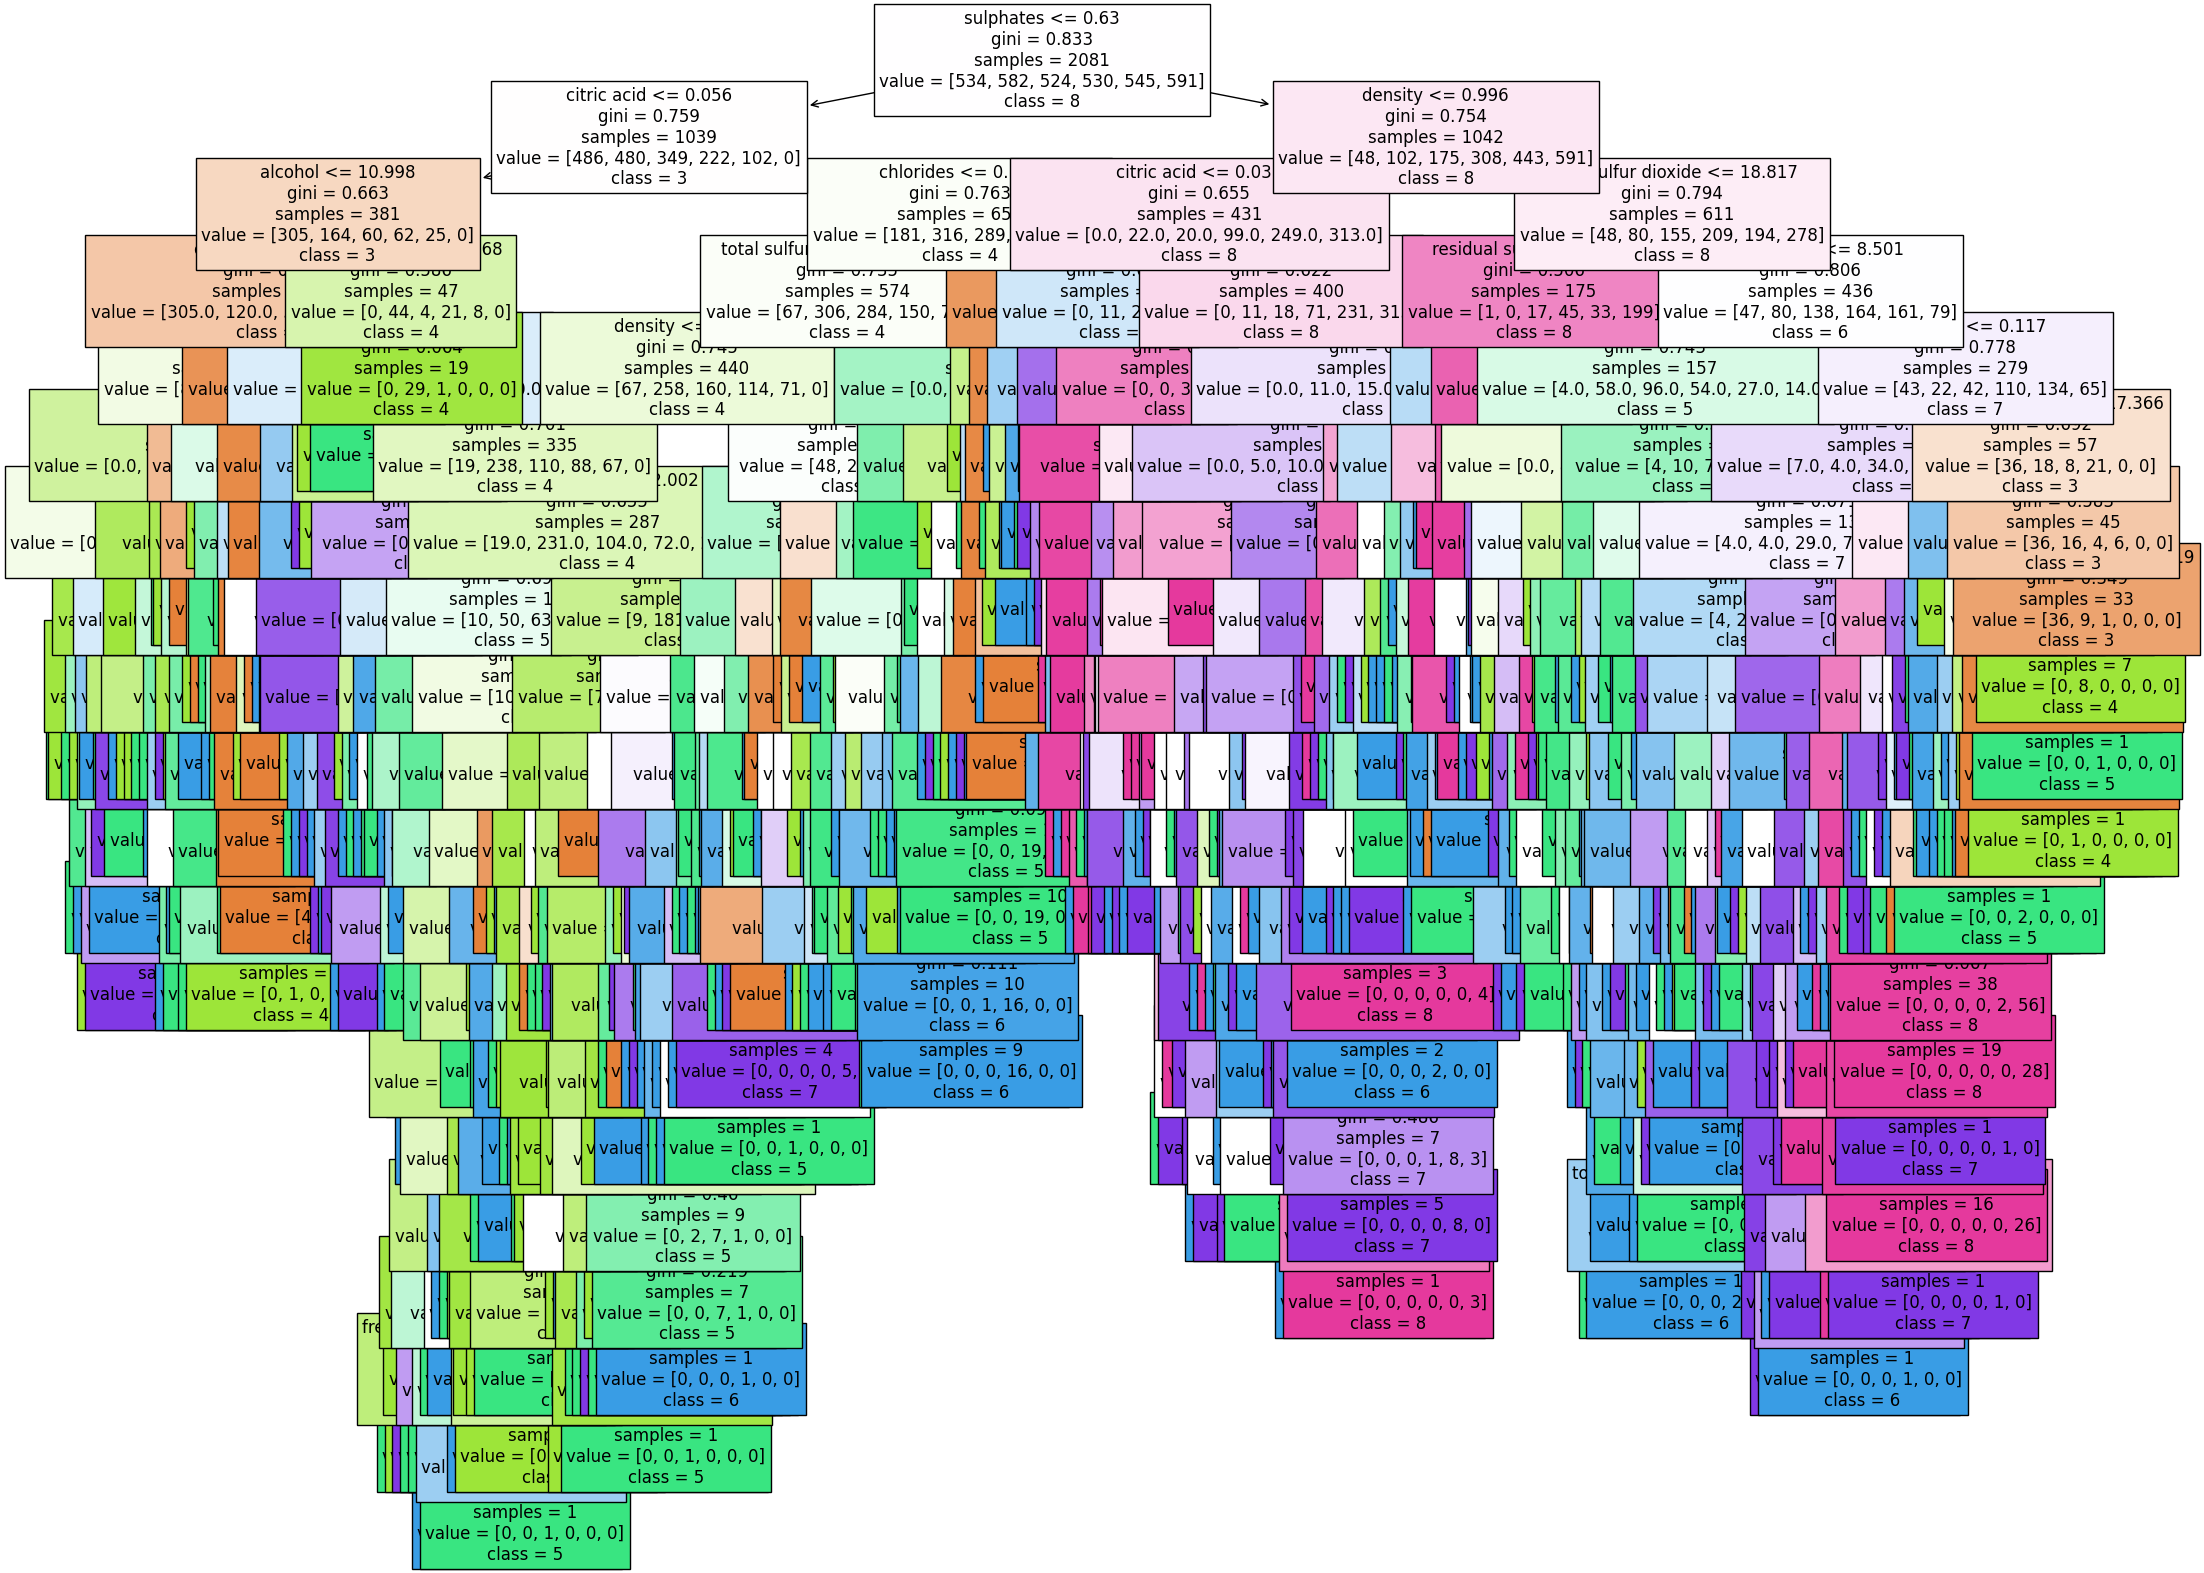

In [41]:
#Extract one tree from the forest (e.g., the first tree)
from sklearn import tree

estimator = clf.estimators_[0]

#Plot the extracted tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(estimator, 
                   feature_names=feature_names,  
                   class_names=['3', '4', '5', '6', '7', '8'],
                   filled=True,
                   fontsize=12)

plt.show()